                                                                                                         Saurabh Bajoria
                                                                                                         UBid: sbajoria
                                                                                                         Person no:50208005

**CSE 4/587 Data Intensive Computing**
====================
***LAB3: LARGE SCALE DATA (TEXT) PROCESSING WITH HADOOP MAPREDUCE***
---------------------------------------
                                                                                                       

*What's trending? Wordcount on tweets*
--------------------------------------


 

- Installing the required packages

In [172]:
install.packages("twitteR",repos="cran.r-project.org")
install.packages("wordcloud",repos="cran.r-project.org")
install.packages("RColorBrewer",repos="cran.r-project.org")
install.packages("stringr",repos="cran.r-project.org")
install.packages("wordcloud",repos="cran.r-project.org")


Installing package into 'C:/Users/Saurabh/Documents/R/win-library/3.3'
(as 'lib' is unspecified)
Installing package into 'C:/Users/Saurabh/Documents/R/win-library/3.3'
(as 'lib' is unspecified)
Installing package into 'C:/Users/Saurabh/Documents/R/win-library/3.3'
(as 'lib' is unspecified)
Installing package into 'C:/Users/Saurabh/Documents/R/win-library/3.3'
(as 'lib' is unspecified)
Installing package into 'C:/Users/Saurabh/Documents/R/win-library/3.3'
(as 'lib' is unspecified)


- Including the libraries installed

In [1]:
library(lubridate)
library(twitteR)
library(wordcloud)
library(RColorBrewer)
library(stringr)
library(wordcloud)


Attaching package: 'lubridate'

The following object is masked from 'package:base':

    date

Warning message:
"package 'wordcloud' was built under R version 3.3.3"Loading required package: RColorBrewer


- Authentication for Twitter API, required to extract tweets from Twitter

In [2]:
consumer_key <-'0rnEKoYQGRaumOd70HSbwpSM6'
consumer_secret <- 'kmqdpKcMHsOqeVY2MgSTXMPoZsLTLlyrxlIEmvJPb7ULp6Gjh6'
access_token <- '805074888419635202-i0IlVwS7UR7vq7sMg9BSY431VyJ2Tyj'
access_secret <- 'P089q9h1GHxw9ER9UCB5ZqM4Y1ng7uH5VmaT8aubK6drt'
setup_twitter_oauth(consumer_key,consumer_secret,access_token,access_secret)

[1] "Using direct authentication"


- Using the following three key words to extract tweets

In [3]:
text1="soccer"
text2="economy"
text3="cricket"

- Extracting the tweets for all the keywords across last 10 days
- Using the lubridate package to manipulate date and retrieve tweets
- Also, stripping the retweets to avoid duplication

In [6]:
untilDate=Sys.Date()-10
for(i in 1:10) {
    sinceDate=untilDate
    untilDate=ymd(sinceDate) + days(1)
    print(sinceDate)
    print(untilDate)
tweetList1 <- searchTwitter(text1,n=100,since=toString(sinceDate), until=toString(untilDate))
    tweetList1<-strip_retweets(tweetList1)
tweetList2 <- searchTwitter(text2,n=100,since=toString(sinceDate), until=toString(untilDate))
    tweetList2<-strip_retweets(tweetList2)
tweetList3 <- searchTwitter(text3,n=100,since=toString(sinceDate), until=toString(untilDate))
    tweetList3<-strip_retweets(tweetList3)
tweetsDf1<- twListToDF(tweetList1)
tweetsDf2<- twListToDF(tweetList2)
tweetsDf3<- twListToDF(tweetList3)
write(tweetsDf1$text, file = paste("Tweets\\RawTweets\\soccer",i,".txt", sep=""),append=FALSE)
write(tweetsDf2$text, file = paste("Tweets\\RawTweets\\economy",i,".txt", sep=""),append=FALSE)
write(tweetsDf3$text, file = paste("Tweets\\RawTweets\\cricket",i,".txt", sep=""),append=FALSE)
    }

[1] "2017-04-13"
[1] "2017-04-14"
[1] "2017-04-14"
[1] "2017-04-15"
[1] "2017-04-15"
[1] "2017-04-16"
[1] "2017-04-16"
[1] "2017-04-17"
[1] "2017-04-17"
[1] "2017-04-18"
[1] "2017-04-18"
[1] "2017-04-19"
[1] "2017-04-19"
[1] "2017-04-20"
[1] "2017-04-20"
[1] "2017-04-21"
[1] "2017-04-21"
[1] "2017-04-22"
[1] "2017-04-22"
[1] "2017-04-23"


- Before the next step, please read the **ReadmeActivity1.txt** to follow the steps for preprocessing the tweets and running WordCount on it using Hadoop Map-Reduce
- The following line will make a connection to the output(from Map-Reduce) file and read it line by line and save it as a dataframe *output*

In [11]:
fileName <- "Activity1\\outputActivity1\\part-r-00000"
conn <- file(fileName,open="r")
lines <-readLines(conn)
output<- data.frame(do.call('rbind', strsplit(as.character(lines),'\t',fixed=TRUE)))
close(conn)
options(warn=-1)

- Convert the second column to numeric

In [12]:
linn$X2<-as.numeric(linn$X2)

- Using brewer package with colour package Dark2 to add colours to tag cloud

In [13]:
pal<-brewer.pal(8,"Dark2")

- Visualize the output using tag cloud
- Keeping the wordlimit to 500 and minimum frequency for the word to be plotted be 1

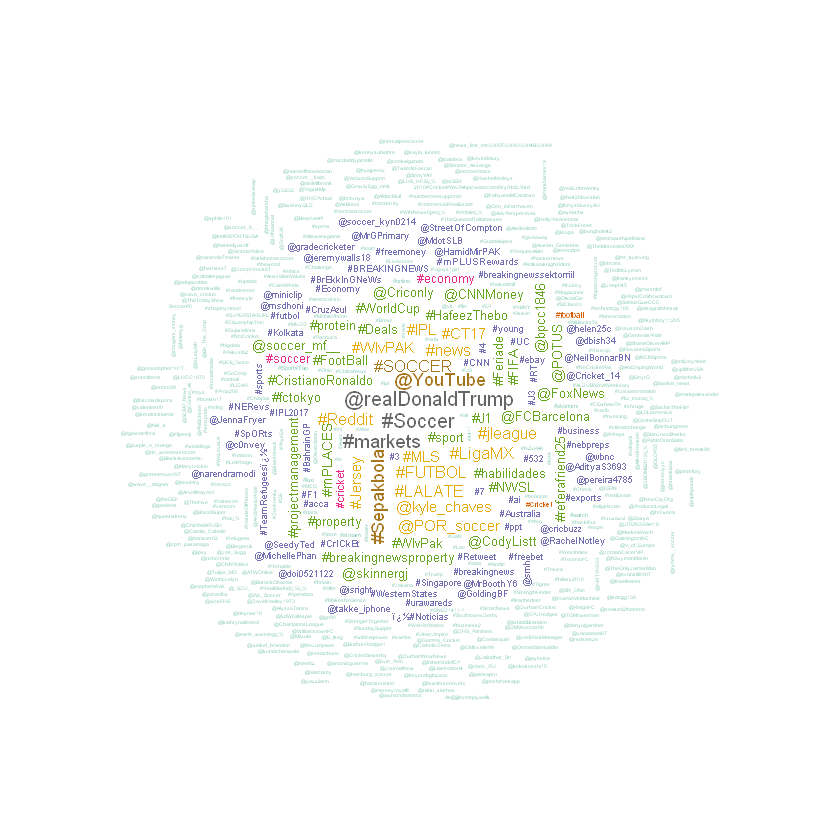

In [14]:
wordcloud(linn$X1,linn$X2,scale=c(1,.2),min.freq=1, max.words=500, random.order=FALSE,rot.per=0.10,,pal)